In [ ]:
# All the requiered libraries for image Classification
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.datasets import cifar10
from tensorflow import keras

In [ ]:
# Split the cifar10 data into train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
#These are the 10 classes that are present in the dataset
category = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

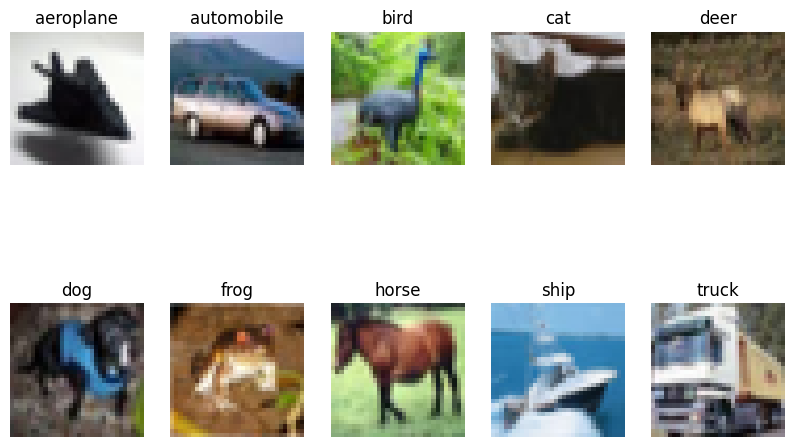

In [ ]:
# plotting the image of every class
plt.figure(figsize=(10,10))
for i in range(num_classes):
    axs = plt.subplot(3, 5, i+1)
    idx = np.where(y_train[:]==i)[0]
    x = x_train[idx,::]
    plt.imshow(x[0])
    axs.set_title(category[i])
    plt.axis("off")

In [ ]:
# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Defining the model
model = Sequential([
    layers.Conv2D(32, (3,3),input_shape=x_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [ ]:
# fiting the model with 10 epochs and 32 batches
seed = 21
np.random.seed(seed)
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 140s 89ms/step - loss: 0.3968 - accuracy: 0.8593 - val_loss: 0.8301 - val_accuracy: 0.7468
Epoch 2/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.3647 - accuracy: 0.8709 - val_loss: 0.7732 - val_accuracy: 0.7665
Epoch 3/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.3358 - accuracy: 0.8809 - val_loss: 0.8069 - val_accuracy: 0.7599
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.3114 - accuracy: 0.8873 - val_loss: 0.9140 - val_accuracy: 0.7486
Epoch 5/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.3006 - accuracy: 0.8919 - val_loss: 0.9007 - val_accuracy: 0.7485
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.2792 - accuracy: 0.9013 - val_loss: 0.9363 - val_accuracy: 0.7523
Epoch 7/10
1563/1563 [==============================] - 99s 64ms/step - loss: 0.2672 - accuracy: 0.9054 - val_loss: 0.

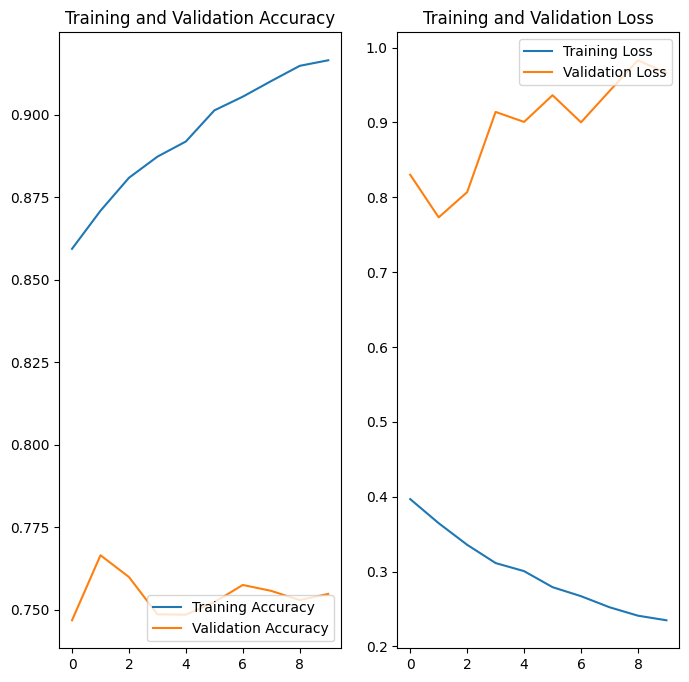

In [ ]:
# Plotting the loss and accuracy graph for Training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3),input_shape=x_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
seed = 21
np.random.seed(seed)
epochs = 50
batch_size = 32
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
1563/1563 [==============================] - 108s 68ms/step - loss: 1.5711 - accuracy: 0.4260 - val_loss: 1.2149 - val_accuracy: 0.5644
Epoch 2/50
1563/1563 [==============================] - 105s 67ms/step - loss: 1.2045 - accuracy: 0.5699 - val_loss: 1.0104 - val_accuracy: 0.6329
Epoch 3/50
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0573 - accuracy: 0.6272 - val_loss: 1.0192 - val_accuracy: 0.6420
Epoch 4/50
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9644 - accuracy: 0.6617 - val_loss: 0.9113 - val_accuracy: 0.6799
Epoch 5/50
1563/1563 [==============================] - 104s 67ms/step - loss: 0.8995 - accuracy: 0.6853 - val_loss: 0.8347 - val_accuracy: 0.7122
Epoch 6/50
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8512 - accuracy: 0.7039 - val_loss: 0.7999 - val_accuracy: 0.7211
Epoch 7/50
1563/1563 [==============================] - 104s 67ms/step - loss: 0.8074 - accuracy: 0.7171 - val_loss: 0

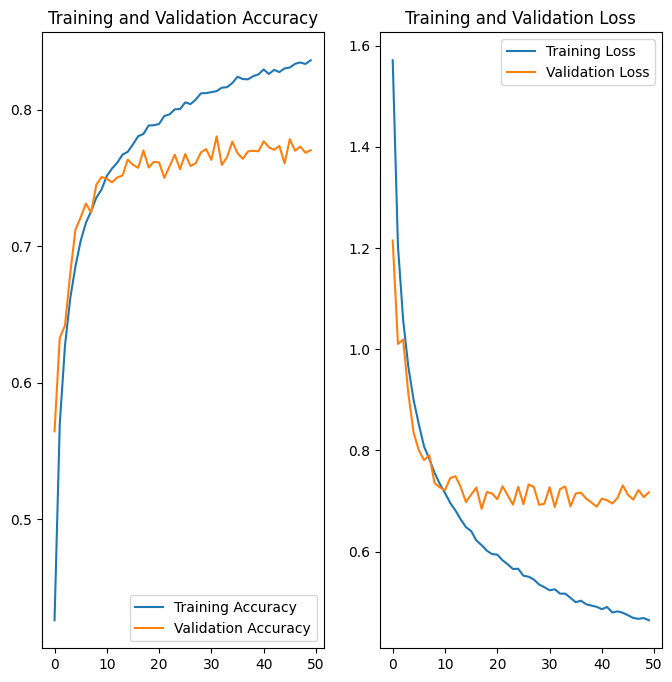

In [ ]:
# Plotting the loss and accuracy graph for Training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
epochs = 25
batch_size = 32
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
1563/1563 [==============================] - 384s 244ms/step - loss: 1.7154 - accuracy: 0.4023 - val_loss: 1.3333 - val_accuracy: 0.5220
Epoch 2/25
1563/1563 [==============================] - 380s 243ms/step - loss: 1.2087 - accuracy: 0.5690 - val_loss: 0.9998 - val_accuracy: 0.6434
Epoch 3/25
1563/1563 [==============================] - 385s 247ms/step - loss: 1.0133 - accuracy: 0.6466 - val_loss: 0.8103 - val_accuracy: 0.7180
Epoch 4/25
1563/1563 [==============================] - 384s 246ms/step - loss: 0.9128 - accuracy: 0.6836 - val_loss: 0.7887 - val_accuracy: 0.7217
Epoch 5/25
1563/1563 [==============================] - 381s 244ms/step - loss: 0.8570 - accuracy: 0.7036 - val_loss: 0.7666 - val_accuracy: 0.7343
Epoch 6/25
1563/1563 [==============================] - 384s 246ms/step - loss: 0.7997 - accuracy: 0.7248 - val_loss: 0.6994 - val_accuracy: 0.7589
Epoch 7/25
1563/1563 [==============================] - 382s 244ms/step - loss: 0.7633 - accuracy: 0.7397 - val_

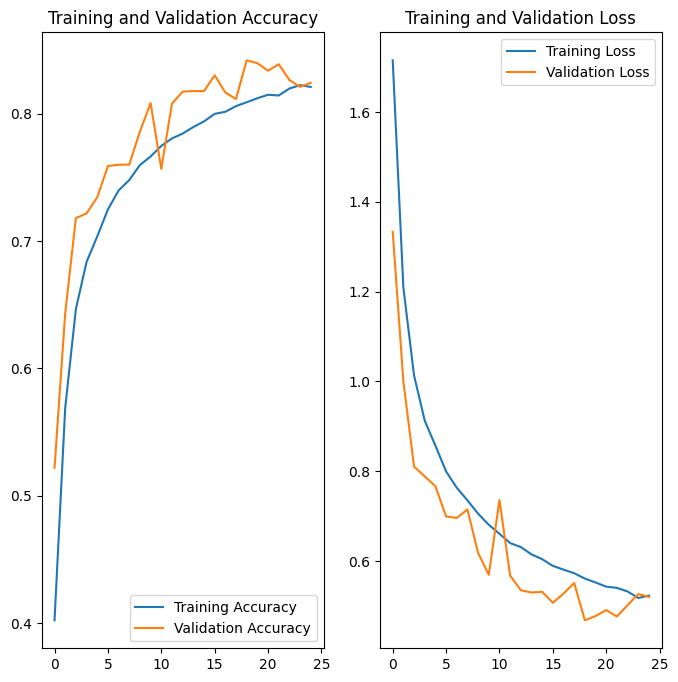

In [ ]:
# Plotting the loss and accuracy graph for Training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
predict = model.predict(x_test)
print(predict)

# converting the predictions into label index
predLabel = np.argmax(predict, axis=1)
print(predLabel)

313/313 [==============================] - 18s 55ms/step
[[1.3546197e-04 4.5404988e-05 4.0821605e-03 ... 2.1097940e-04
  4.1674444e-04 8.0550490e-05]
 [1.3421582e-05 8.7204073e-03 4.9154085e-08 ... 4.2684372e-09
  9.9125546e-01 9.9904655e-06]
 [1.2419204e-04 2.4306036e-03 2.4377753e-06 ... 3.9068584e-07
  9.9735749e-01 7.4562246e-05]
 ...
 [1.7736068e-06 7.0281936e-07 1.5236072e-03 ... 3.3320018e-04
  6.4170024e-07 8.0912679e-07]
 [7.4106581e-03 9.8944330e-01 8.6650769e-05 ... 8.4886909e-05
  8.6765713e-04 4.8745432e-04]
 [6.3180880e-07 1.1325553e-06 3.0694715e-05 ... 9.9702060e-01
  8.1841313e-07 2.0650045e-07]]
[3 8 8 ... 5 1 7]


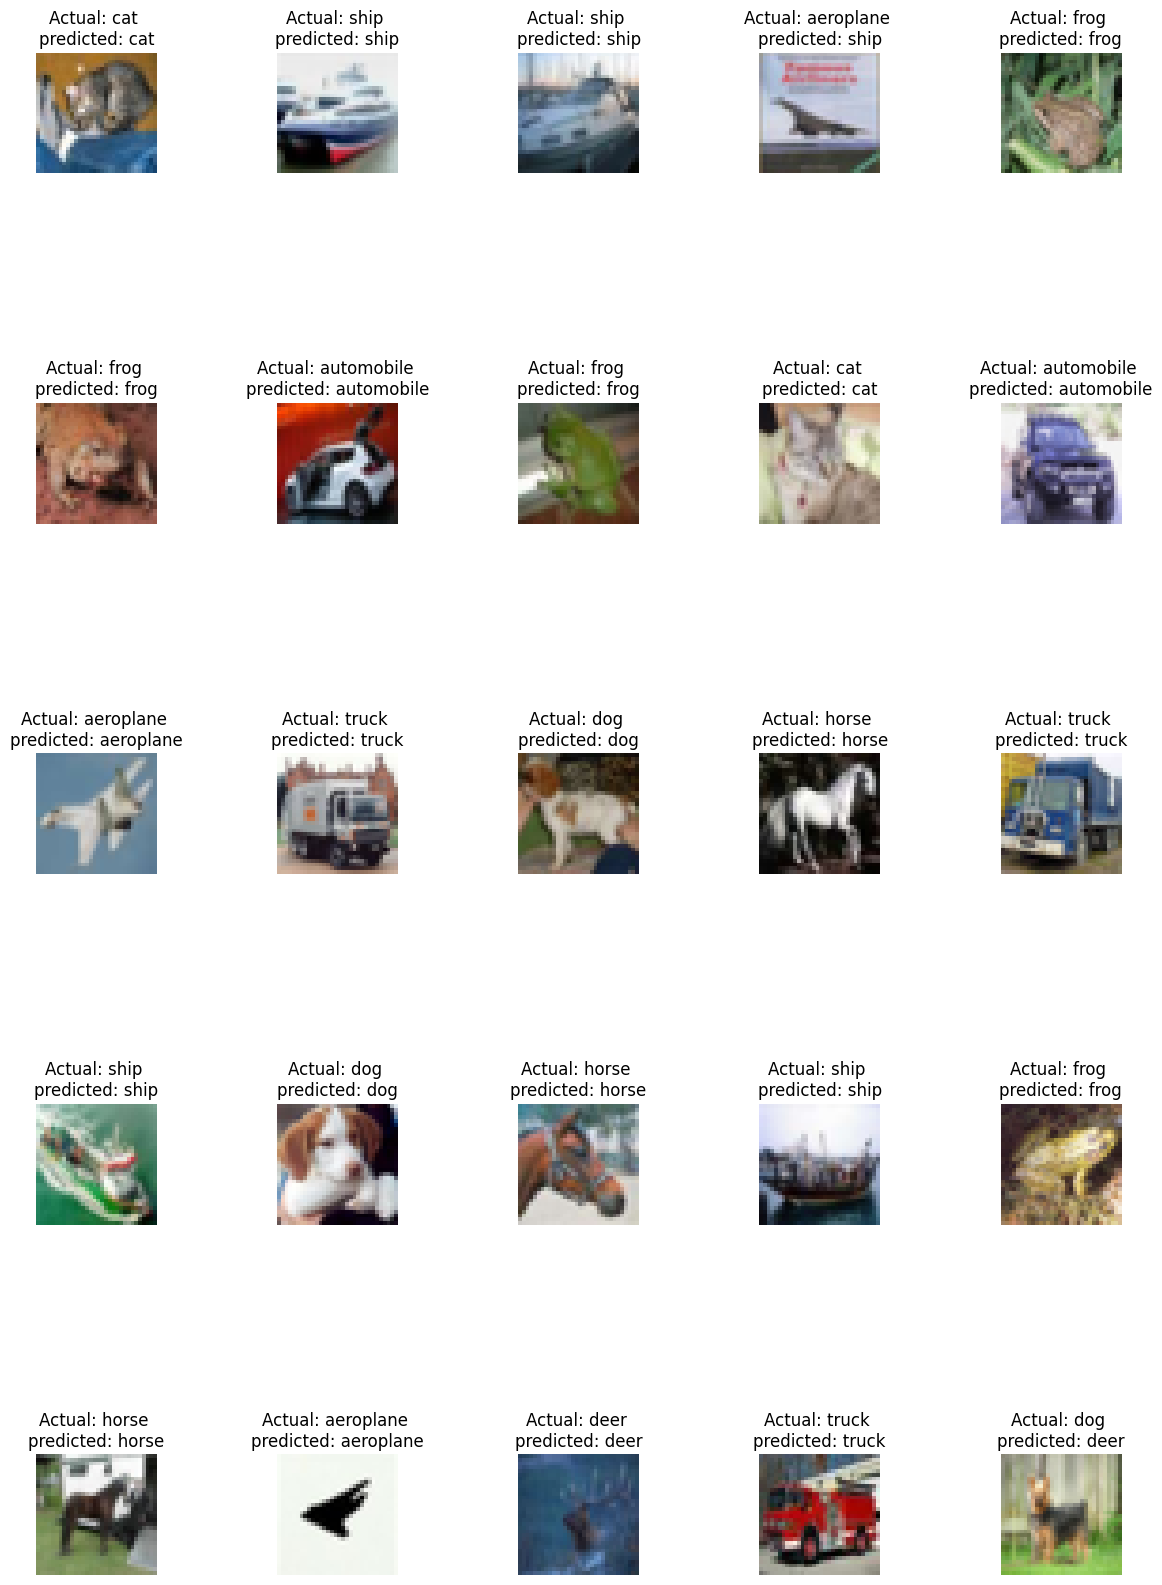

In [ ]:
fi , ax = plt.subplots(5,5, figsize=(14,22))
ax = ax.ravel()

for fig in np.arange(0,25):
  ax[fig].imshow(x_test[fig])
  ax[fig].set_title("Actual: %s \npredicted: %s" % (category[np.argmax(y_test[fig])], category[predLabel[fig]]))
  ax[fig].axis('off')
  plt.subplots_adjust(wspace=1)

1/1 [==============================] - 0s 25ms/step
cat


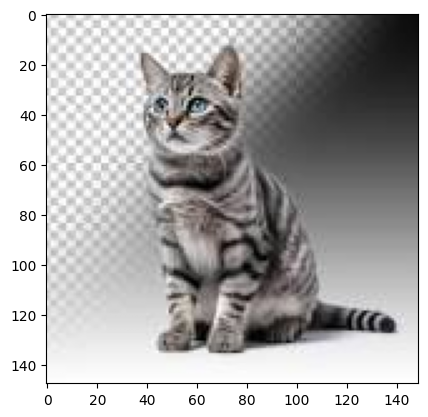

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from skimage import data,color
from skimage.transform import rescale,resize,downscale_local_mean

classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

i1 = image.imread('cat.jpeg')
#normalize the image
i1 = i1/255.0
# resizing the image to match input size
new1 = resize(i1, (32,32,3))
# expanding dimension into 4D
im = np.expand_dims(new1, axis=0)
#im = new1.squeeze()
plt.imshow(i1)
# predicting through model
keypoints = model.predict(im)
# printing the predicted class model
print(classes[np.argmax(keypoints)])

In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=b08dc2eec17c046f5219b3e9bff49bf359b06377e9a854923e0ad4e5f86819ad
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils
